# Oregon Wildlife - Image Classification Capstone - Baseline Modeling
## David Lappin
### BrainStation
#### 3/1/2023 - 4/10/2023

 # Packages Import:

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL 
from glob import glob
import seaborn as sns
import visualkeras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Overview

For our baseline we are going to create a very simple model to start exploring CNNs. After creating this baseline we can evaluate our model and generate potential next steps to further optimize. Similar to our preliminary compatibility testing in the EDA section we are going to create a simple Convolutional Neural Network (CNN) based in TF/Keras for our baseline model.

# Import Data:

In [2]:
#set local path to files for basic exploration

trainpath = 'data/oregon_wildlife/' # This is the relative path to the data
valpath = 'data/oregon_wildlife_validation/' # This is the relative path to the data
testpath = 'data/oregon_wildlife_test/' # This is the relative path to the data

Ensure Data is still in the same state as we left it from the previous EDA before modeling.

In [5]:
#check number of images in train folder

totalcount_train = []
image_files = os.listdir(trainpath)

for file in image_files:
    
    count = len(list(glob(f'data/oregon_wildlife/{file}/*')))
    totalcount_train.append(count)
    print(f'{count}: {file}')
    
print(f'Total images: {sum(totalcount_train)}')

588: bald_eagle
560: black_bear
535: bobcat
558: canada_lynx
580: columbian_black-tailed_deer
518: cougar
581: coyote
608: deer
505: elk
513: gray_fox
575: gray_wolf
420: mountain_beaver
536: nutria
569: raccoon
495: raven
602: red_fox
426: ringtail
540: seals
570: sea_lions
571: virginia_opossum
Total images: 10850


In [6]:
#check number of images in Validation folder

totalcount_validation = []
image_files = os.listdir(valpath)
for file in image_files:
    
    count = len(list(glob(f'data/oregon_wildlife_validation/{file}/*')))
    totalcount_validation.append(count)
    print(f'{count}: {file}')
    
print(f'Total images: {sum(totalcount_validation)}')

135: bald_eagle
135: black_bear
135: bobcat
135: canada_lynx
135: columbian_black-tailed_deer
135: cougar
135: coyote
135: deer
135: elk
135: gray_fox
135: gray_wolf
135: mountain_beaver
135: nutria
135: raccoon
135: raven
135: red_fox
135: ringtail
135: seals
135: sea_lions
135: virginia_opossum
Total images: 2700


In [7]:
#check number of images in test folder

totalcount_test = []
image_files = os.listdir(testpath)

for file in image_files:
    
    count = len(list(glob(f'data/oregon_wildlife_test/{file}/*')))
    totalcount_test.append(count)
    print(f'{count}: {file}')
    
print(f'Total images: {sum(totalcount_test)}')

20: bald_eagle
20: black_bear
20: bobcat
20: canada_lynx
20: columbian_black-tailed_deer
20: cougar
20: coyote
20: deer
20: elk
20: gray_fox
20: gray_wolf
20: mountain_beaver
20: nutria
20: raccoon
20: raven
20: red_fox
20: ringtail
20: seals
20: sea_lions
20: virginia_opossum
Total images: 400


### Observations: 
Everything looks the same.

# Prepare Data:

In [8]:
#define image loading parameters 

batch_size = 32 #use batch size of 32 images 
img_height = 180 
img_width = 180

For now we are goin to leave the hieght and widgth at 180x180. If we need to reduce the complexity of the photos later for modeling we can reduce these values.

In [69]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
  trainpath,
  label_mode='int',
  seed=7,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_set = tf.keras.preprocessing.image_dataset_from_directory(
  valpath,
  label_mode='int',
  seed=7,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10850 files belonging to 20 classes.
Found 2700 files belonging to 20 classes.


**Note** These values match the counts from the directory above. 

# Create and Compile Baseline Model

Similar to our preliminary compatibility testing in the EDA section we are going to create a simple Convolutional Neural Network (CNN) based in TF/Keras for our baseline model.

In [70]:
#save and check class_names in the training set

class_names = train_set.class_names
len(class_names)


20

Below:
- **Autotune** allows for CPU performance optimizaiton
- **Cache** - stores imported images in memory for future epoch iterations
- **prefetch** - allows for overlapping of preprocess and training

In [11]:
#adjust the prefetching for performance

AUTOTUNE = tf.data.AUTOTUNE #Autotune optimizes CPU uptime for each batch

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) #cache stores data in memory after 1st epoch for faster iterations
val_set = val_set.cache().prefetch(buffer_size=AUTOTUNE) #prefetch allows for overlapping 



A basic CNN including three convolutions and Maxpooling layers, one dense layer and an output layer equal to the number of classes present in the data (20).

**NOTE:** Per Tensorflow guidance: "This model has not been tuned for high accuracy". This model construction will serve as a basic baseline to build off of.

In [15]:
#build model 

num_classes = len(class_names) # define the number of classes

#define model sequential
Baseline_model = Sequential([
 
  #include rescaling layer directly in model build  
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  
  #include the convolution blocks with max pooling layers, and 'relu' activation  
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  #flatten   
  layers.Flatten(),
    
  #dense layer (single) with relu activation  
  layers.Dense(128, activation='relu'),
    
  #output later with num_classes (20)   
  layers.Dense(num_classes, activation = 'softmax')
])


Compile the model using:
- Adam Optimzer (high performing gradient decent method, default learning rate = 0.001)
 - note there are other options but we will stick with Adam
- SparseCategoricalCrossentropy loss calcualtion  (used when there are more than two classes or labels)

In [16]:
#compile the model

Baseline_model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [17]:
#look at the compiled model summary 

Baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

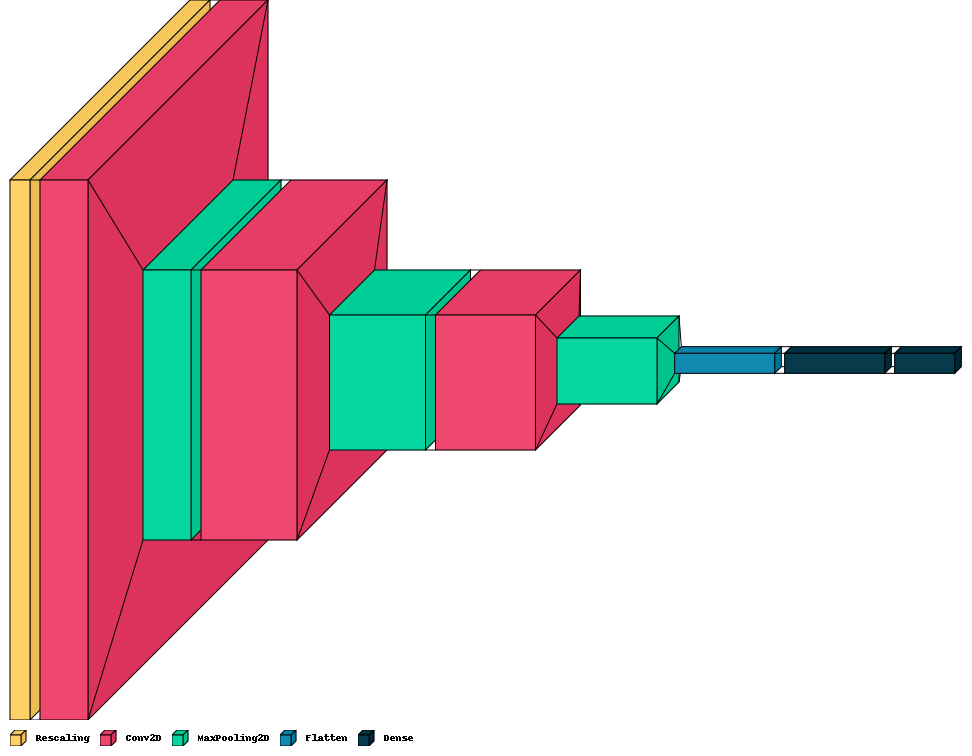

In [163]:
#visualize the model summary with VisualKeras
visualkeras.layered_view(Baseline_model, legend = True, draw_volume = True, scale_xy=3, scale_z=3, max_z=100, \
                         to_file = 'modelvisualizations/Baseline_model.png')


In our baseline model we have now compiled all the layers. There are ~4million trainable parameters, and we see our output layer is 20 which matches our class labels. 

Next we can fit our model to the training data using 25 epochs or until early stopped as defined by the callback below. Our model will be validated on the validation split. The test set will be saved for predictions later. 

In [42]:
# set stopping criteria

callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.05, patience=5)

# Fit and Run

In [44]:
#fit model for 25 epochs

epochs = 25

history = Baseline_model.fit(   
  train_set,            
  validation_data=val_set, 
  epochs=epochs,
  callbacks = [callbacks]
)

Epoch 1/25
340/340 [==============================] - 118s 269ms/step - loss: 2.6143 - accuracy: 0.1973 - val_loss: 2.3414 - val_accuracy: 0.2800
Epoch 2/25
340/340 [==============================] - 92s 269ms/step - loss: 1.9282 - accuracy: 0.4235 - val_loss: 1.7617 - val_accuracy: 0.4848
Epoch 3/25
340/340 [==============================] - 90s 263ms/step - loss: 1.1031 - accuracy: 0.6848 - val_loss: 1.3593 - val_accuracy: 0.6700
Epoch 4/25
340/340 [==============================] - 87s 256ms/step - loss: 0.4620 - accuracy: 0.8736 - val_loss: 1.3611 - val_accuracy: 0.7356
Epoch 5/25
340/340 [==============================] - 89s 261ms/step - loss: 0.1709 - accuracy: 0.9578 - val_loss: 1.4899 - val_accuracy: 0.7778
Epoch 6/25
340/340 [==============================] - 99s 290ms/step - loss: 0.0897 - accuracy: 0.9814 - val_loss: 1.5643 - val_accuracy: 0.7911
Epoch 7/25
340/340 [==============================] - 94s 277ms/step - loss: 0.0474 - accuracy: 0.9924 - val_loss: 1.7994 - val_a

### Observations:

The model stopped (early stopping) at 11/25 epochs. We can now save the model for future loading and begin to visualize and evaluate our baseline model:

Save the model: (note this code is only needed if you plan to save the model weights after running)

In [46]:
#save the model weights for use in predictions later if desired

#Baseline_model.save('models/Baseline.h5')

# Preliminary Evaluation

We can visualize the model perfmormance.

##### SOURCE - plot code base from TF Guide:
https://www.tensorflow.org/tutorials/images/classification

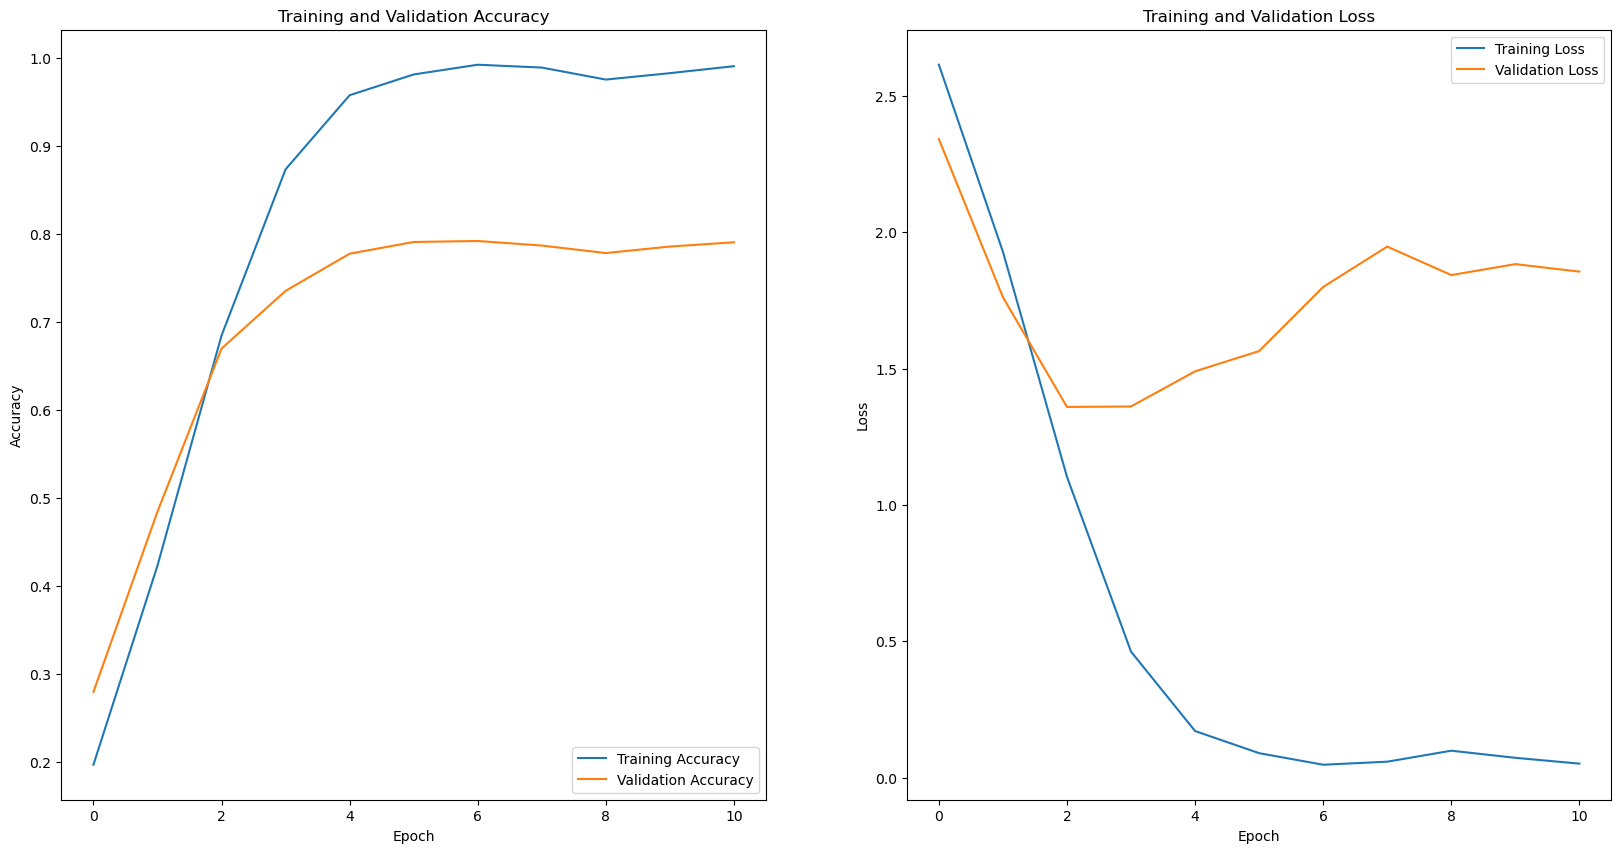

In [54]:
#visualize model performance (plots code ref from TF guide)


#pull out the accuracy and validation accuracies from model fit history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#pull out the loss data from the model fit history
loss = history.history['loss']
val_loss = history.history['val_loss']

#x lab range defined by the # of epochs ran
epochs_range = range(len(acc))

#training vs Validation Accuracies
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#visualize loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations:

The training and validation accuracy increased rapidly over the first 4 epochs. The training accuracy achieved nearly 99% accuracy and the validation accuracy achieved a 79% accuracy. This seems like a decent start, but the model is very obviously overfit. In addition, we will need to address the rapid learning of our model. While the validation accuracy achieved is impressive, it does raise some red flags to potential data leakage in our image sets given the simplicity of the model. 

We can next import our test data to make predictions and further evaluate the models performance:

# Import Test Data and Make Predictions

In [90]:
#import test set directory for predictions

test_set = tf.keras.preprocessing.image_dataset_from_directory(
  testpath,
  image_size=(img_height, img_width),
  label_mode = 'categorical') #since these are not for training we can load as categorical rather than integer

Found 400 files belonging to 20 classes.


#### SOURCE

Found way to extract multiple predictions across whole dataset from answer by (Frightera, 2021)
https://stackoverflow.com/questions/68121629/trying-to-extract-y-val-from-dataset-throws-all-the-input-arrays-must-have-same

In [91]:
#generate predictions on test data

predictions = np.array([]) #empty list for predictions
labels =  np.array([]) #empty list for labels


for x, y in test_set:
  
  #generate predictions 
  predictions = np.concatenate([predictions, np.argmax(Baseline_model.predict(x), axis = -1)]) 

  #generate true labels
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])
    

1/1 [==============================] - 0s 48ms/step


In [92]:
# generate a tensorflow confusion matrix from the predictions and true labels above

con_mat = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

In [93]:
#normalize the values such that they fit on a 0-1 scale
normalized_conf_mat = con_mat / con_mat.sum(axis=1)

In [94]:
#define the class names and create temp dataframe to that we can plot using the class names (instead of integers)

class_names = test_set.class_names
con_mat_df = pd.DataFrame(normalized_conf_mat, index=class_names, columns=class_names)

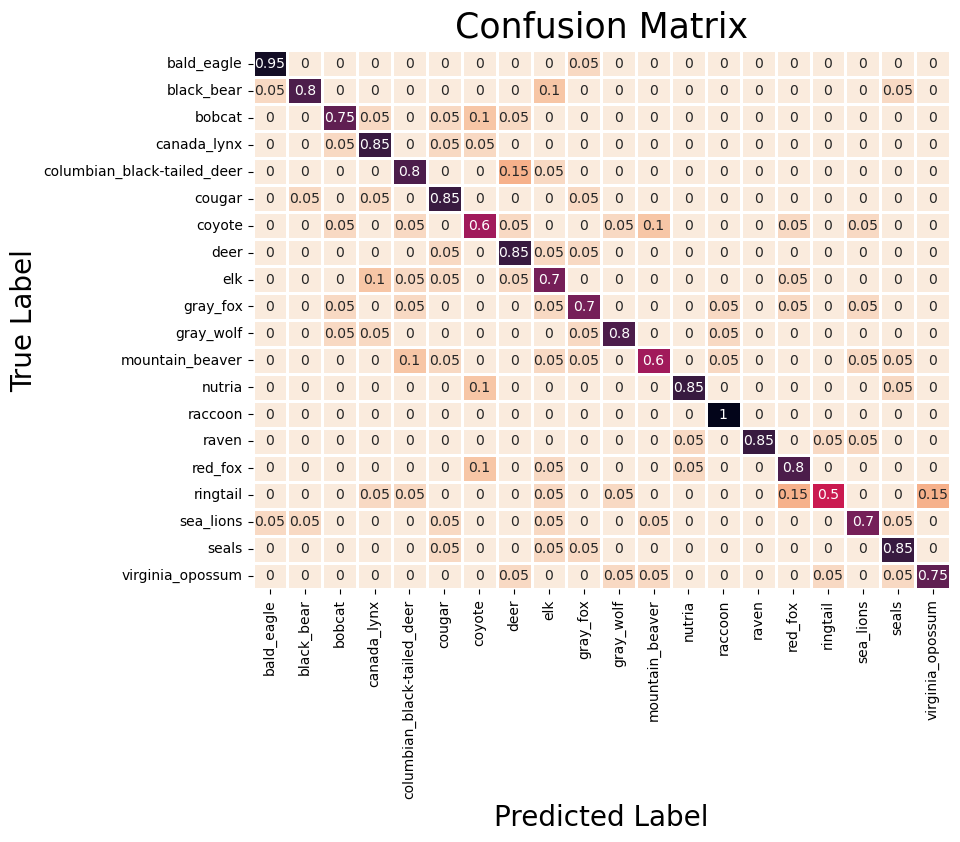

In [95]:
#plot confusion matrix using the data frame with class names created above
plt.figure(figsize = (9,7))
sns.heatmap(con_mat_df,
            annot=True,
            cbar=False,
            cmap="rocket_r",
            linewidths=1
           )
plt.title('Confusion Matrix',size = 25,y=1.01)
plt.xlabel("Predicted Label", size = 20)
plt.ylabel("True Label", size = 20)
plt.show()

### Observations:

Looking at the confusion matrix give us some insight to the classes the model is successfully predicting and the classes the model is struggling with. The values in the matrix represnt the recall, which is the measure of the models accuracy in correctly identifying `True Positives`, or in this case, for all the images in each class, what proportion did our model correctly identify. Based on this matrix, the model seems to be performing fairly well across the board with some classes greater than 85%. Ringtails, coyotes, and mountain beavers preformed the worst.

We will need to dig further into the model evaluation and look at the precision and the f-1 score. We can generate a classification report to look at all the information together:

In [101]:
#generate classification report from predictions

target_names = test_set.class_names
print(classification_report(labels, predictions, target_names = target_names))

                             precision    recall  f1-score   support

                 bald_eagle       0.90      0.95      0.93        20
                 black_bear       0.89      0.80      0.84        20
                     bobcat       0.79      0.75      0.77        20
                canada_lynx       0.74      0.85      0.79        20
columbian_black-tailed_deer       0.73      0.80      0.76        20
                     cougar       0.71      0.85      0.77        20
                     coyote       0.63      0.60      0.62        20
                       deer       0.71      0.85      0.77        20
                        elk       0.58      0.70      0.64        20
                   gray_fox       0.70      0.70      0.70        20
                  gray_wolf       0.84      0.80      0.82        20
            mountain_beaver       0.75      0.60      0.67        20
                     nutria       0.89      0.85      0.87        20
                    raccoon      

To sort and look closer at the data we can translate the above information into a pandas dataframe so we can sort/agg/visualize the data easier if desired.

##### SOURCE - classification report to pandas df:

https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

In [125]:
#translate the classification report into pd df

classification_report_report = classification_report(labels, predictions, target_names = target_names, output_dict = True)
classification_report_df = pd.DataFrame(classification_report_report).transpose()
classification_report_df

,precision,recall,f1-score,support
bald_eagle,0.904762,0.9500,0.926829,20.0000
black_bear,0.888889,0.8000,0.842105,20.0000
bobcat,0.789474,0.7500,0.769231,20.0000
canada_lynx,0.739130,0.8500,0.790698,20.0000
columbian_black-tailed_deer,0.727273,0.8000,0.761905,20.0000
cougar,0.708333,0.8500,0.772727,20.0000
coyote,0.631579,0.6000,0.615385,20.0000
deer,0.708333,0.8500,0.772727,20.0000
elk,0.583333,0.7000,0.636364,20.0000
gray_fox,0.700000,0.7000,0.700000,20.0000


### Observations:

We can now see the recall as well as the precision and the f1-scores. Precision tells us the proportion of of positive identification that were actually positive. So, for example the elk has a precision of 0.5833 meaning that when the model predicts an image of an elk, it is correct 58.33% of the time. The elk also has a recall of 0.7000 meaning that it correctly identified 70% of the elk in the test set.

Comparing these values is a trade off as increasing the recall would ultimately hinder precision and visa-versa.

We can look to the f1-scores to really evaluate the models over-all performance. The f1-score is defined as the 'harmonic mean of the model's precision and recall' and is a measure of the models accuracy (with 0 being the worst and 1 being the best). The weighted avg for f1-score for our baseline model is 0.77 which is very good, but again may be a red flag considering the simplicity of the model. 

Lets look at some of the best and worst classes based on thier f1-scores:

In [121]:
#best f1 scores

classification_report_df.sort_values('f1-score', ascending = False).head(5)

,precision,recall,f1-score,support
raccoon,0.869565,1.00,0.930233,20.0
bald_eagle,0.904762,0.95,0.926829,20.0
raven,1.000000,0.85,0.918919,20.0
nutria,0.894737,0.85,0.871795,20.0
black_bear,0.888889,0.80,0.842105,20.0


In [122]:
#worst f1 scores

classification_report_df.sort_values('f1-score', ascending = False).tail(5)

,precision,recall,f1-score,support
gray_fox,0.700000,0.7,0.700000,20.0
mountain_beaver,0.750000,0.6,0.666667,20.0
elk,0.583333,0.7,0.636364,20.0
ringtail,0.833333,0.5,0.625000,20.0
coyote,0.631579,0.6,0.615385,20.0


### Observations

We see that many of the best scores come from very unique animals. Alternatively, the worst are nearly all animals that share similarities with other classes. Gray fox, ringtails, and coyotes, while different in size, share very simlar features. Elk also are very similar to the two species of deer present which could complicate their identification by the model. 

# Optional Load for Future Model Predictions:

If desired in the future, the code below can be used as an example for loading the model to predict on new data or to continue training. The '.h5' file extension saves the model construction, the trained weights, and time information from `compile()`.

##### SOURCE
https://www.tensorflow.org/guide/keras/save_and_serialize

In [156]:
#optional code to re-load and predict on new data

load_model = keras.models.load_model("models/Baseline.h5") 


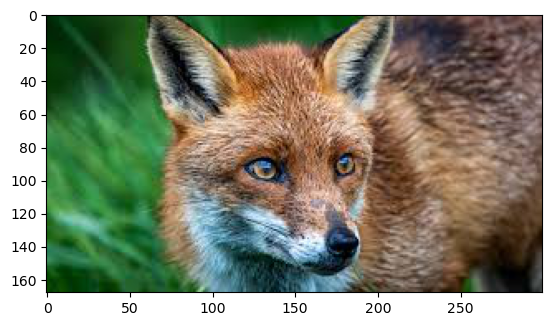

In [157]:
img_path = "randphotos/foximage1.jpg"
img = image.load_img(img_path)
plt.imshow(img)
plt.show()

##### SOURCE - For predicting new data below - TF guide
https://www.tensorflow.org/tutorials/images/classification#predict_on_new_data

In [158]:
img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = load_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))


1/1 [==============================] - 0s 57ms/step
This image most likely belongs to red_fox with a 12.43 percent confidence.


# Summary and Next Steps